In [13]:

from netCDF4 import Dataset, num2date
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Open the NetCDF4 file
file_path = "/Users/enrico/Downloads/nepal_file.nc"  # Replace with your file path
nc_data = Dataset(file_path, mode='r')

# Explore the file
print(nc_data)  # Provides an overview of dimensions, variables, and attributes
print(nc_data.variables.keys())  # Lists all variables in the file



<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    GRIB_centre: ecmf
    GRIB_centreDescription: European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre: 0
    Conventions: CF-1.7
    institution: European Centre for Medium-Range Weather Forecasts
    history: 2024-11-25T20:20 GRIB to CDM+CF via cfgrib-0.9.14.1/ecCodes-2.36.0 with {"source": "data.grib", "filter_by_keys": {"stream": ["oper"]}, "encode_cf": ["parameter", "time", "geography", "vertical"]}
    dimensions(sizes): valid_time(25314), latitude(2), longitude(1)
    variables(dimensions): int64 number(), int64 valid_time(valid_time), float64 latitude(latitude), float64 longitude(longitude), <class 'str'> expver(valid_time), float32 t2m(valid_time, latitude, longitude)
    groups: 
dict_keys(['number', 'valid_time', 'latitude', 'longitude', 'expver', 't2m'])


In [16]:
import sys
import os
import math
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import geodatasets
import geopandas as gpd
import re
import folium
from folium import plugins
import earthpy as et
import webbrowser
from matplotlib.colors import LogNorm, Normalize
from matplotlib.cm import get_cmap
from branca.colormap import LinearColormap
import statsmodels.api as sm
from scipy.stats import norm
import elevation
import shapely.geometry
from shapely.geometry import Point, box, Polygon, MultiPolygon
import seaborn as sns
from shapely.wkt import loads
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px
import rasterio
from rasterio.plot import show
from rasterio.warp import reproject, Resampling, calculate_default_transform
from rasterio.transform import from_bounds, from_origin
from rasterio.mask import mask
import earthpy.spatial as es
from scipy.interpolate import RegularGridInterpolator
from matplotlib.backends.backend_pdf import PdfPages
import streamlit as st
import matplotlib.colors as mcolors
import PyCO2SYS as cs


In [14]:
# Open the NetCDF file
nc_data = Dataset(file_path, mode="r")

# Extract dimensions and variables
time_raw = nc_data.variables["valid_time"][:]  # Time in seconds since epoch
time_units = nc_data.variables["valid_time"].units  # Units of time
time_calendar = getattr(nc_data.variables["valid_time"], "calendar", "proleptic_gregorian")  # Calendar
latitude = nc_data.variables["latitude"][:]  # Latitude values
longitude = nc_data.variables["longitude"][:]  # Longitude values
temperature = nc_data.variables["t2m"][:, 0, 0]  # Temperature at latitude[0], longitude[0]

# Convert time to human-readable format
time_cftime = num2date(time_raw, units=time_units, calendar=time_calendar)

# Convert cftime to standard datetime
time = [datetime.strptime(str(t), "%Y-%m-%d %H:%M:%S") for t in time_cftime]

# Close the NetCDF file
nc_data.close()

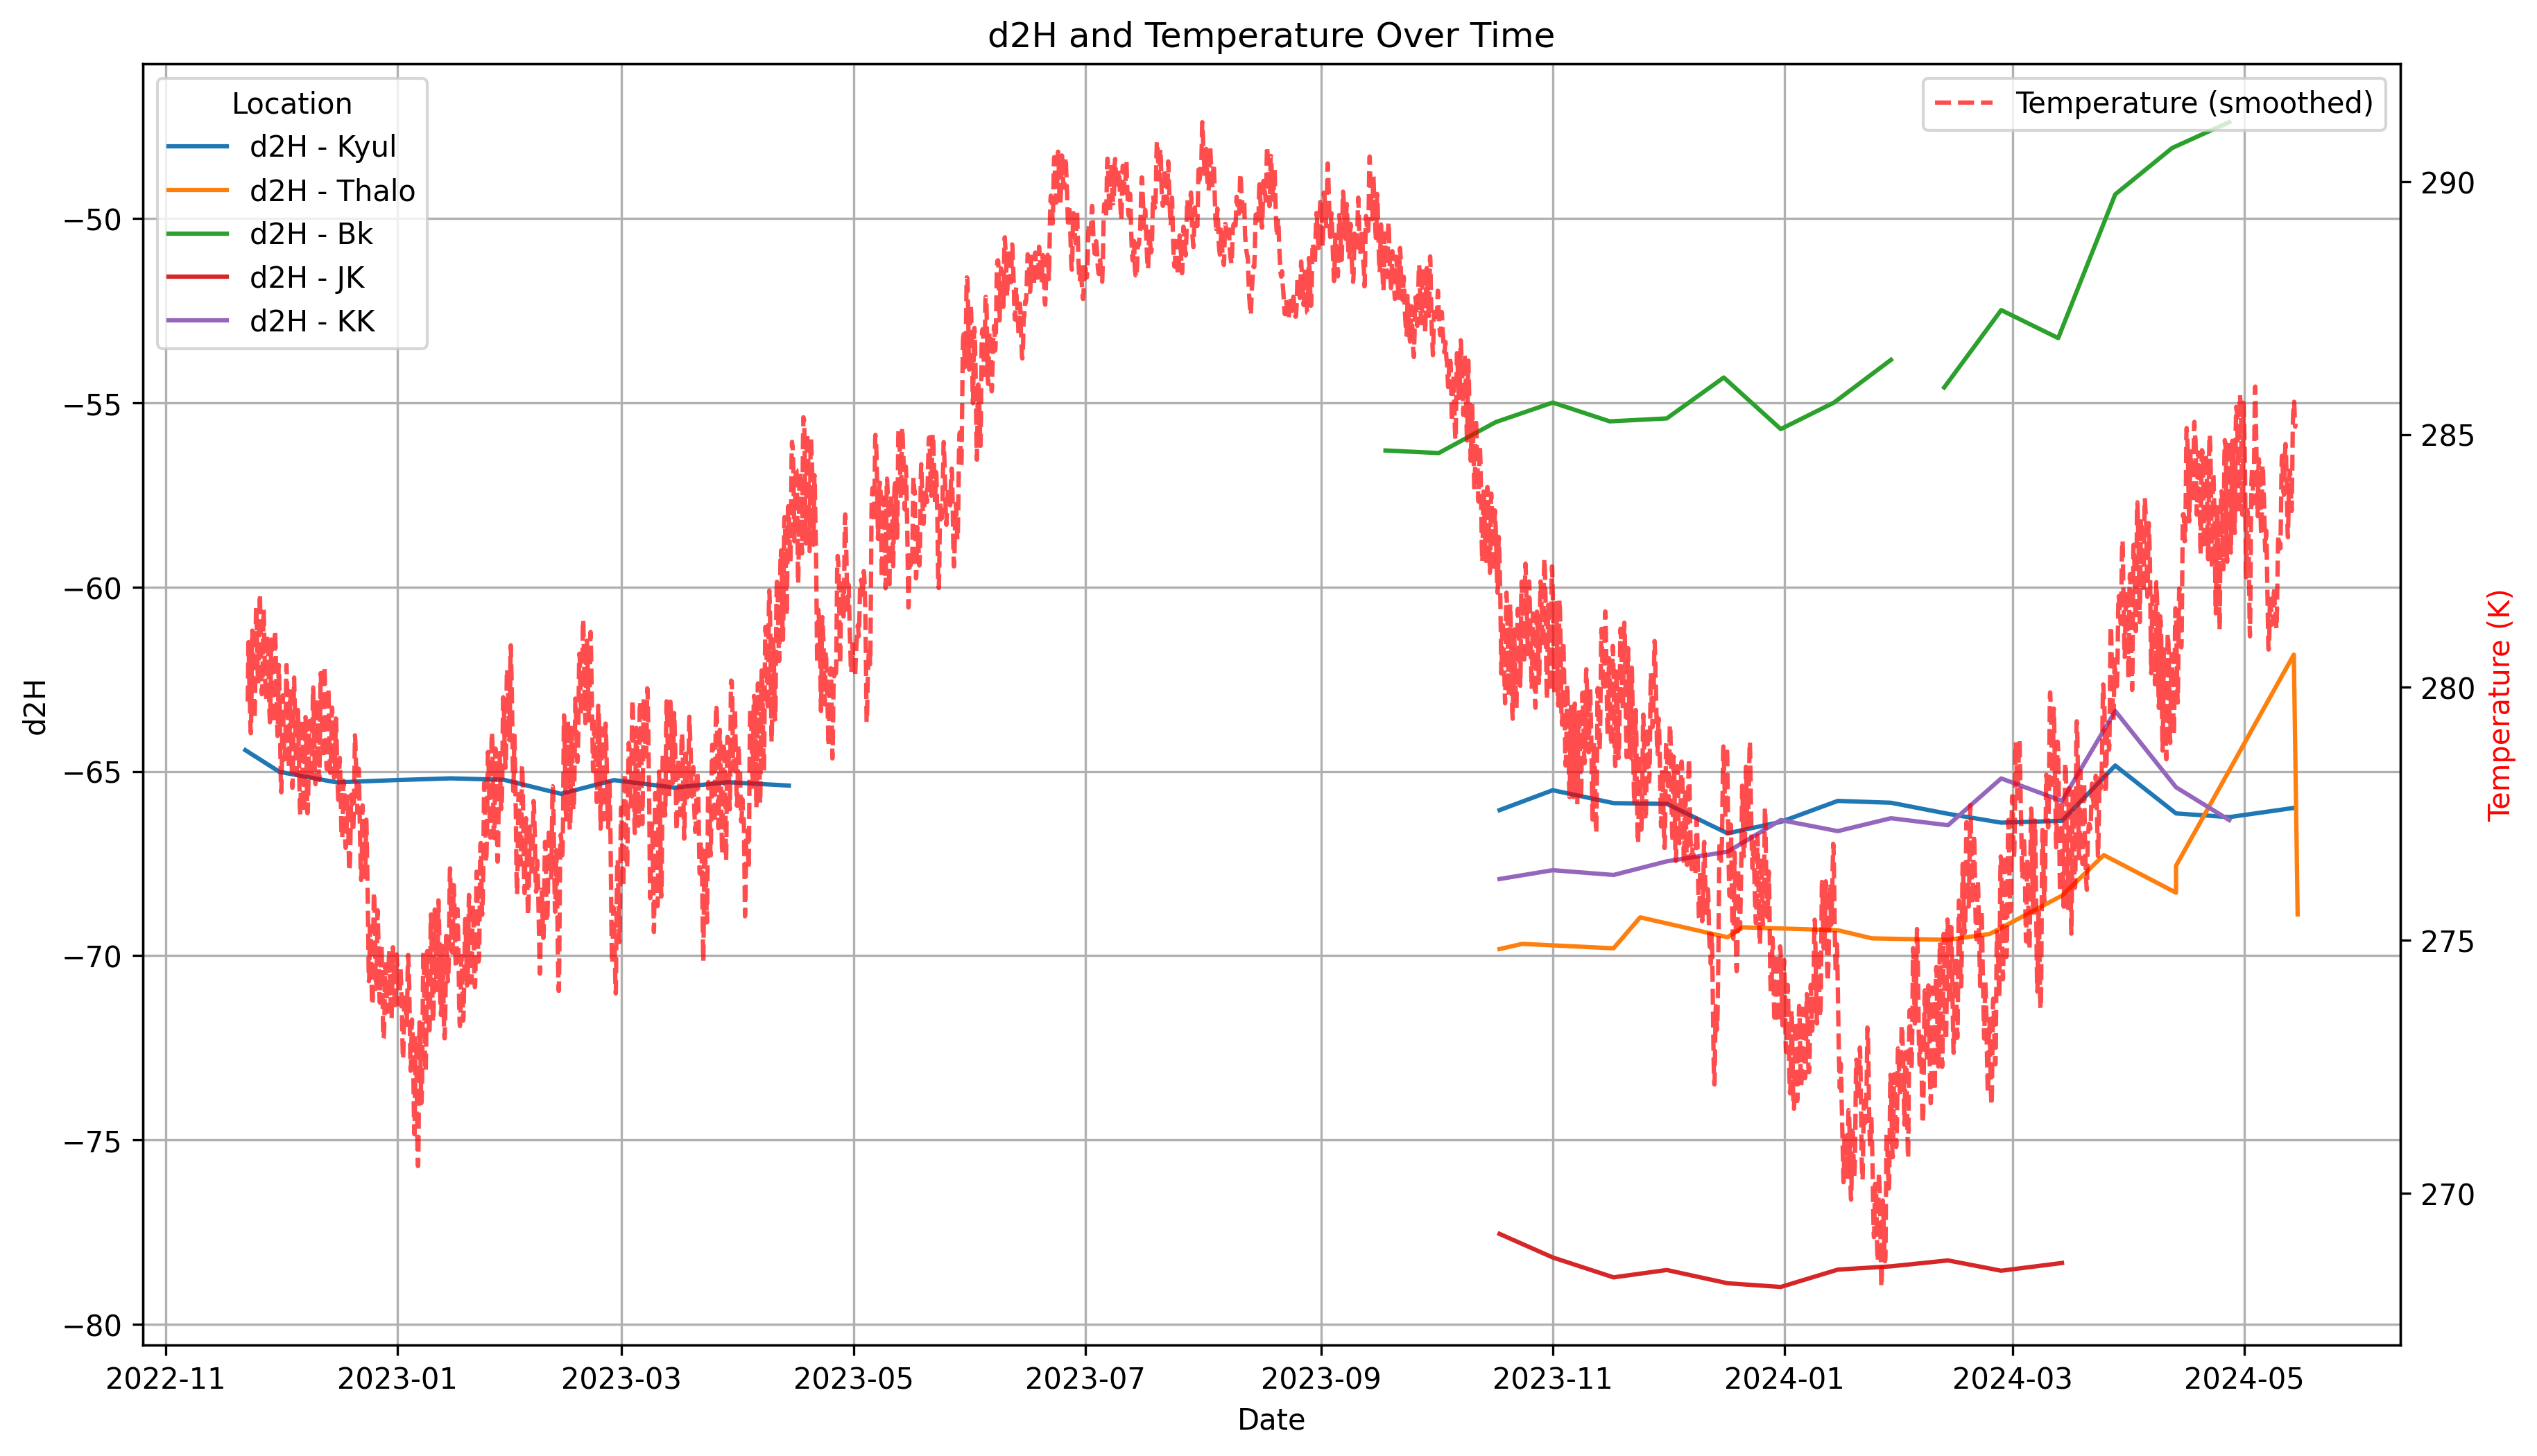

In [37]:
# Filter temperature data to the range of d2H data
temp_filtered = [temp for t, temp in zip(time, temperature) if df_copy['Date'].min() <= t <= df_copy['Date'].max()]
time_filtered = [t for t in time if df_copy['Date'].min() <= t <= df_copy['Date'].max()]

# Apply rolling average to temperature
window_size = 30  # Adjust the window size for smoothing
temp_smoothed = pd.Series(temp_filtered).rolling(window=window_size, center=True).mean()

# Create the combined plot
plt.figure(figsize=(14, 8), dpi = 300)

# Plot d2H for each location
locations = df_copy['Season'].unique()
for location in locations:
    location_data = df_copy[df_copy['Season'] == location]
    plt.plot(location_data['Date'], location_data['d2H'], label=f'd2H - {location}')

# Add smoothed temperature to the secondary axis
ax1 = plt.gca()  # Get current axis
ax2 = ax1.twinx()  # Create a secondary y-axis
ax2.plot(time_filtered, temp_smoothed, label='Temperature (smoothed)', color='red', linestyle='--', alpha=0.7)
ax2.set_ylabel('Temperature (K)', color='red')

# Customize the plot
ax1.set_xlabel('Date')
ax1.set_ylabel('d2H')
ax1.set_title('d2H and Temperature Over Time')
ax1.legend(loc='upper left', title="Location")
ax2.legend(loc='upper right')
ax1.grid()

plt.show()

In [17]:
df = pd.read_excel('/Users/enrico/Desktop/Part III Project/Code/Nepal-1/Datasets/Nepal Master Sheet.xlsx', sheet_name='Final_compiled')

df_copy = df.copy()

In [26]:
#Filter df_copy to include samples that include the string "imeseries" in the "Season" column

df_copy = df_copy[df_copy['Season'].str.contains("imeseries")]

# print unique sample IDs  
print(df_copy['Season'].unique())

['Kyul_timeseries' 'Thalo_timeseries' 'Bk_Timeseries' 'JK_Timeseries'
 'KK_Timeseries' 'Kyul_Timeseries' 'Thalo_Timeseries']


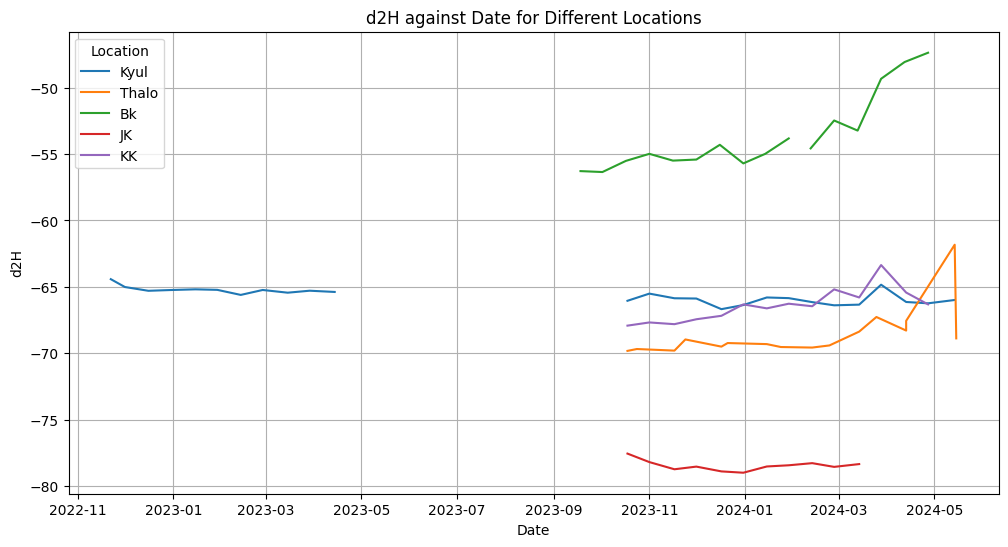

In [29]:


# Standardize location naming
df_copy['Season'] = df_copy['Season'].replace({
    'Kyul_timeseries': 'Kyul',
    'Kyul_Timeseries': 'Kyul',
    'Thalo_timeseries': 'Thalo',
    'Thalo_Timeseries': 'Thalo',
    'Bk_Timeseries': 'Bk',
    'JK_Timeseries': 'JK',
    'KK_Timeseries': 'KK'
})



# Ensure Date column is in datetime format
df_copy['Date'] = pd.to_datetime(df_copy['Date'])

# Plot each location separately
plt.figure(figsize=(12, 6))

locations = df_copy['Season'].unique()
for location in locations:
    location_data = df_copy[df_copy['Season'] == location]
    plt.plot(location_data['Date'], location_data['d2H'], label=location)

# Customize the plot
plt.xlabel('Date')
plt.ylabel('d2H')
plt.title('d2H against Date for Different Locations')
plt.legend(title="Location")
plt.grid()
plt.show()
